# 1st level. Titanic: Machine Learning from Disaster
 * https://www.kaggle.com/c/titanic
 * 캐글 코리아 그랜드 마스터 '이유한'님 참고 필사본

# Contents
 * 1. 데이터셋 확인
  * 1.1 Null data check
  * 1.2 Target label 확인
 * Exploratory data analysis
  * 2.1 Pclass
  * 2.2 Sex
  * 2.3 Both Sex and Pclass
  * 2.4 Age
  * 2.5 Pclass, Sex, Age
  * 2.6 Embarked
  * 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
  * 2.8 Cabin

# 목표
 * 타이타닉에 탑승한 사람들의 신상정보를 활용하여 승선한 사람들의 생존 여부를 예측하는 모델을 생성
 * 여러 시각화 도구(matplotlib, seaborn, plotly), 데이터 분석도구(pandas, numpy), 머신러닝 도구(sklearn)을 사용할 예정
 
 
 * 다른 캐글 자료 참고바람
 * 복사 및 붙여넣기 금지, 필사 및 코드리뷰

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib의 기본 scheme가 아닌 seaborn scheme을 setting 
plt.style.use('seaborn')
sns.set(font_scale=2.5)  # seaborn의 font_scale 사용

# 결측치를 시각화해서 보기 좋은 Toolsset
# https://github.com/ResidentMario/missingno
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 진행 프로세스
 1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다
 
 
 2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
 
 
 3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
 
 
 4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.
 
 
 5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.
 
 
 6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

# 1. Dataset 확인
 * Python에서 table화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas 입니다.
 * 우리는 pandas를 사용하여 데이터셋의 간단한 통계적 분석 부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.
 * Python으로 데이터분석을 한다고 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하면서 사용법에 익숙해지도록 반복하길 권장합니다.
 * 캐글에서 데이터셋은 보통 train, test set으로 나뉘어 있습니다.

In [2]:
df_train = pd.read_csv('C:\\code\\Kaggle-Transcription\\titanic_data\\train.csv')
df_test = pd.read_csv('C:\\code\\Kaggle-Transcription\\titanic_data\\test.csv')

In [3]:
df_train.head() # 데이터셋에서 head(앞부분만 5개 확인)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


|변수(feature)|정의|설명|타입|
|---|---|---|---|
|survival|생존여부|target label임, 1, 0으로 표현|int|
|Pclass|티켓의 클래스|1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature |int|
|sex|성별|male, female 로 구분되며 binary|str|
|Age|나이|continuous|int|
|sibSp|함께 탑승한 형제와 배우자|quantitative|int|
|parch|함께 탑승한 부모, 아이의 수|quantitative|int|
|ticket|티켓 번호|alphabat + integer|str|
|fare|탑승료|continuous|float|
|cabin|객실 번호|alphabat + integer|str|
|embarked|탑승 항구|C = Cherbourg, Q = Queenstown, S = Southampton|str|

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe() # 기술 통계량을 보여주는 함수

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


* 테이블에서 보면, PassenserID와 다른 값이 있는 것으로 보아 cull data가 존재하는 열(feature)가 있는 것으로 확인.
* 시각화해서 살펴보기

# 1.1 Null data check

In [7]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)                                                                  

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


* {:>10} : 오른쪽 정렬
* {:.2f}% : 소수점 2자리까지 표시
* 100 * (각 feature(column)들의 결측치 / 데이터셋의 총 index(=891))
 * 비율로 보기 위해 * 100을 사용.

* Train, Test set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있습니다.
* MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

<AxesSubplot:>

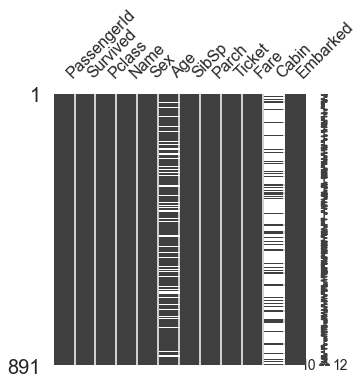

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(5, 5))

* iloc은 컴퓨터가 읽기 쉽도록 데이터가 있는 위치(순서)에 접근한다고 생각하면 됨.
* df.iloc[행 인덱스, 열 인덱스]
* df_train.iloc[:, :]는 전체 index를 뜻함
* color=(0.8, 0.5, 0.2)는 주황색, color의 초기값은 검정색
 * color는 RGB 값.

<AxesSubplot:>

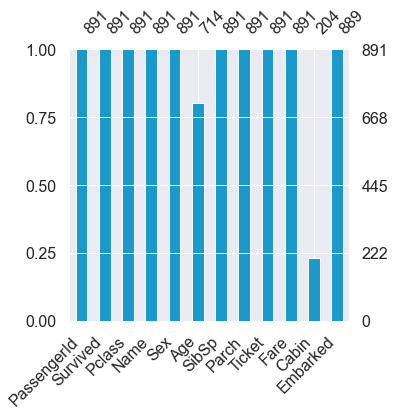

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(5, 5), color=(0.1, 0.6, 0.8))

# 1.2 Target label 확인
 * target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
 * 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

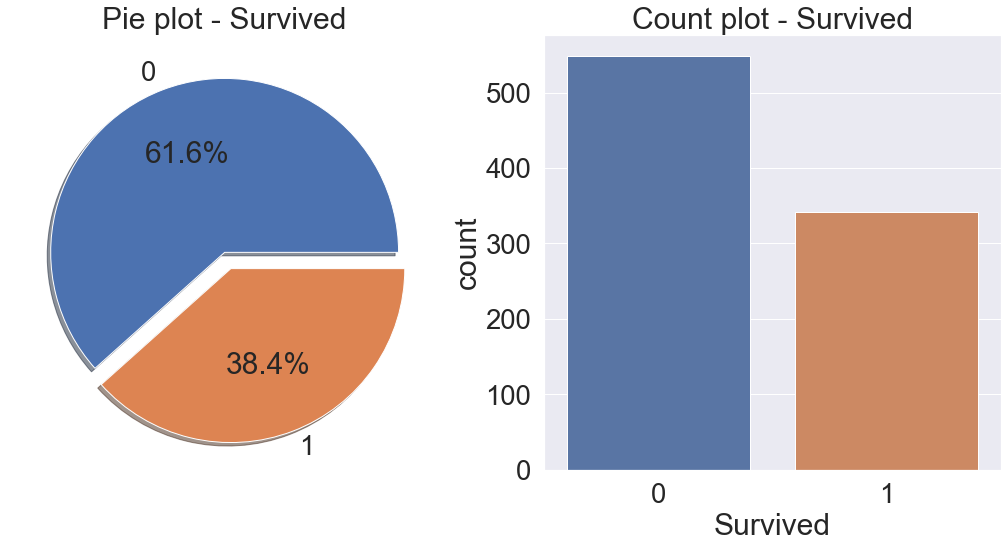

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # subplot 그리기

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* value_counts()는 어떤 column 혹은 Series의 unique value들을 count해주는 함수
* plot.pie는 pie 차트를 그릴 때 사용.
 * https://wikidocs.net/92114
 * explode :  부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정함.(0과 1의 영역에서 반지름의 10%만큼 벗어나도록 설정)
 * autopct : 부채꼴 안에 표시될 숫자의 형식을 지정, 소수점 1자리까지 설정
 * ax : 축으로 figure상에 축을 기준으로 그릴 위치를 선정
 * shadow : 파이 차트에서 그림자 표시
* sns.countplot : 항목별 개수를 세어서 시각화

* 죽은 사람이 많음.
* 38.4%가 살아 남았음(1은 생존, 0은 사망)
* target label 의 분포가 제법 균일(balanced)합니다. 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.

# 2. Exploratory data analysis
 * 데이터 분석 및 시각화

# 2.1 Pclass
 * Pclass 는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입
 * Pclass 에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.
 * 'Pclass', 'Survived' 를 가져온 후, pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다
 * 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)사람의 총합을 주게 됩니다

In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


* pandas의 crosstab을 사용하면 위의 내용을 좀 더 명확하게 파악할 수 있다.

In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* count()를 사용했을 때는 각 등급별로 전체(All) 인원이 집계되었다.
* sum()을 사용했을 때는 1로 생존한 사람만 집계되었다.

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

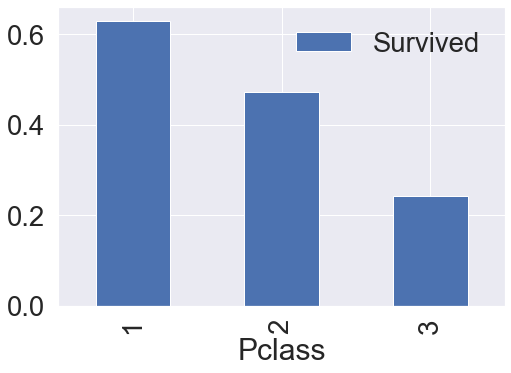

In [15]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

* 전체 인원에서 생존한 비율
* sort_values(by='Survived', ascending=False)는 Survived 기준으로 오름차순으로 정렬하지 않는다는 뜻.


* Pclass가 높을 수록 생존률이 높다.

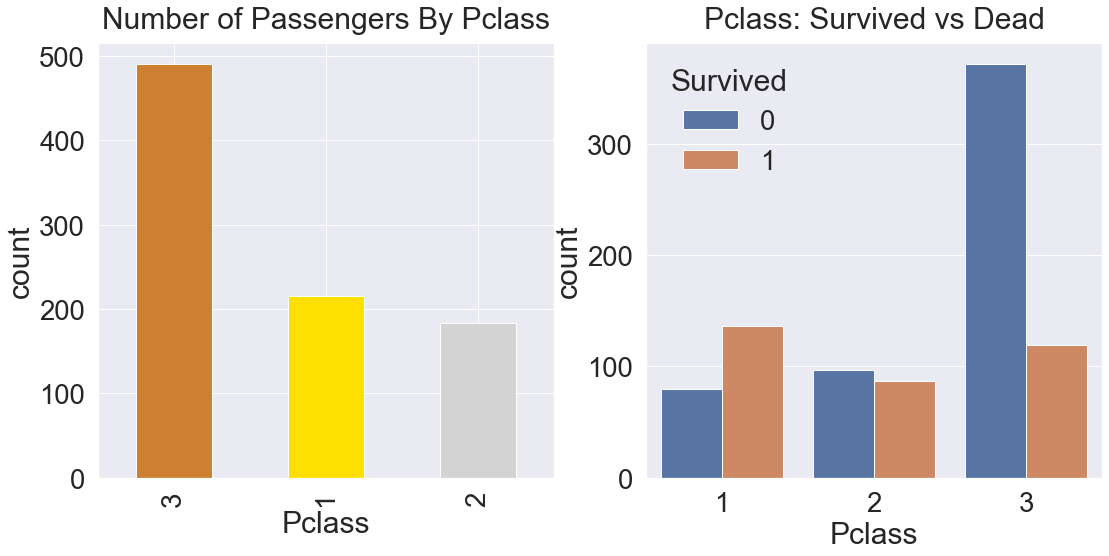

In [16]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_xlabel('Pclass') 
ax[0].set_ylabel('count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

* set_position의 y=y_position은 제목의 수직 축 위치입니다(1.0이 맨 위). None(기본값)이면 Axes의 데코레이터를 피하기 위해 y가 자동으로 결정됩니다.
* 생존률을 예측하기 위해 직접적인 상관관계가 있을만한 feature로 사용할 수 있다. 
* countplot의 hue는 legend(범례)의 목차를 Survived를 기준으로 나오게 함

# 2.2 Sex

* 성별로 생존률이 어떻게 달라지는 지 확인해보겠습니다
* pandas groupby와 seaborn countplot을 사용해서 시각화를 해봅시다

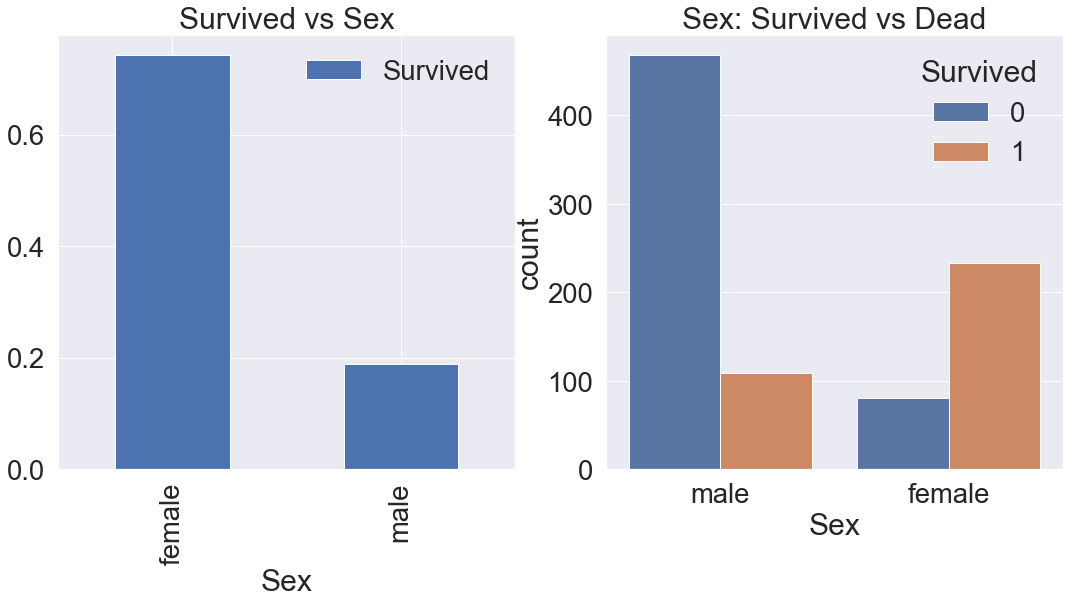

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

* 여자가 생존할 확률이 높습니다.

In [18]:
# df_train[['Sex', 'Survived']].groupby(['Sex']).mean()
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


* as_index=False : 사용하지 않을 경우 Sex가 index로 들어갑니다.

In [19]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


* margins은 두 데이터의 총합
* Pclass와 마찬가지로 Sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있음.

# 2.3 Both Sex and Pclass
 * 이번에는 Sex, Pclass 두 가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다.
 * seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

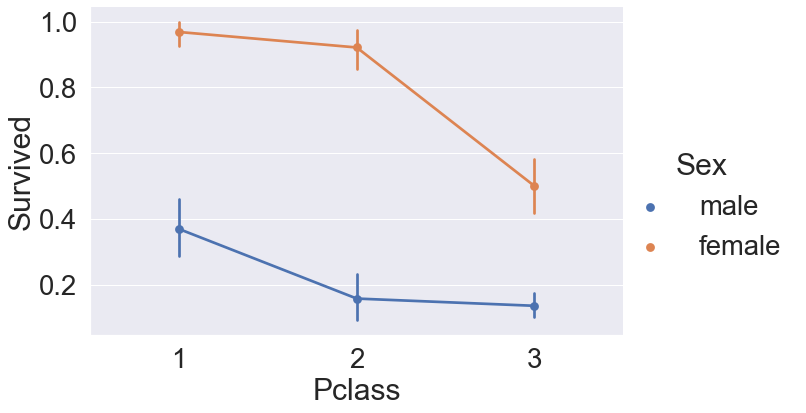

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

* factorplot aspect는 종횡비, 즉 그래프의 가로, 세로 너비를 보기 좋게 표현하기 위해 사용합니다.
* 크기/종횡비가 여백의 범례를 포함하므로 잘 설정해야합니다. 아니면 찌그러져서 보입니다.
* 세로줄은 errorbar로 불리며 그래프에서는 불확실성 또는 오차범위로 생각하면 됩니다.

* 모든 Pclass에서 female이 살 확률이 male보다 높다.
* male, female과는 상관없이 class가 높을 수록 살 확률이 높다.

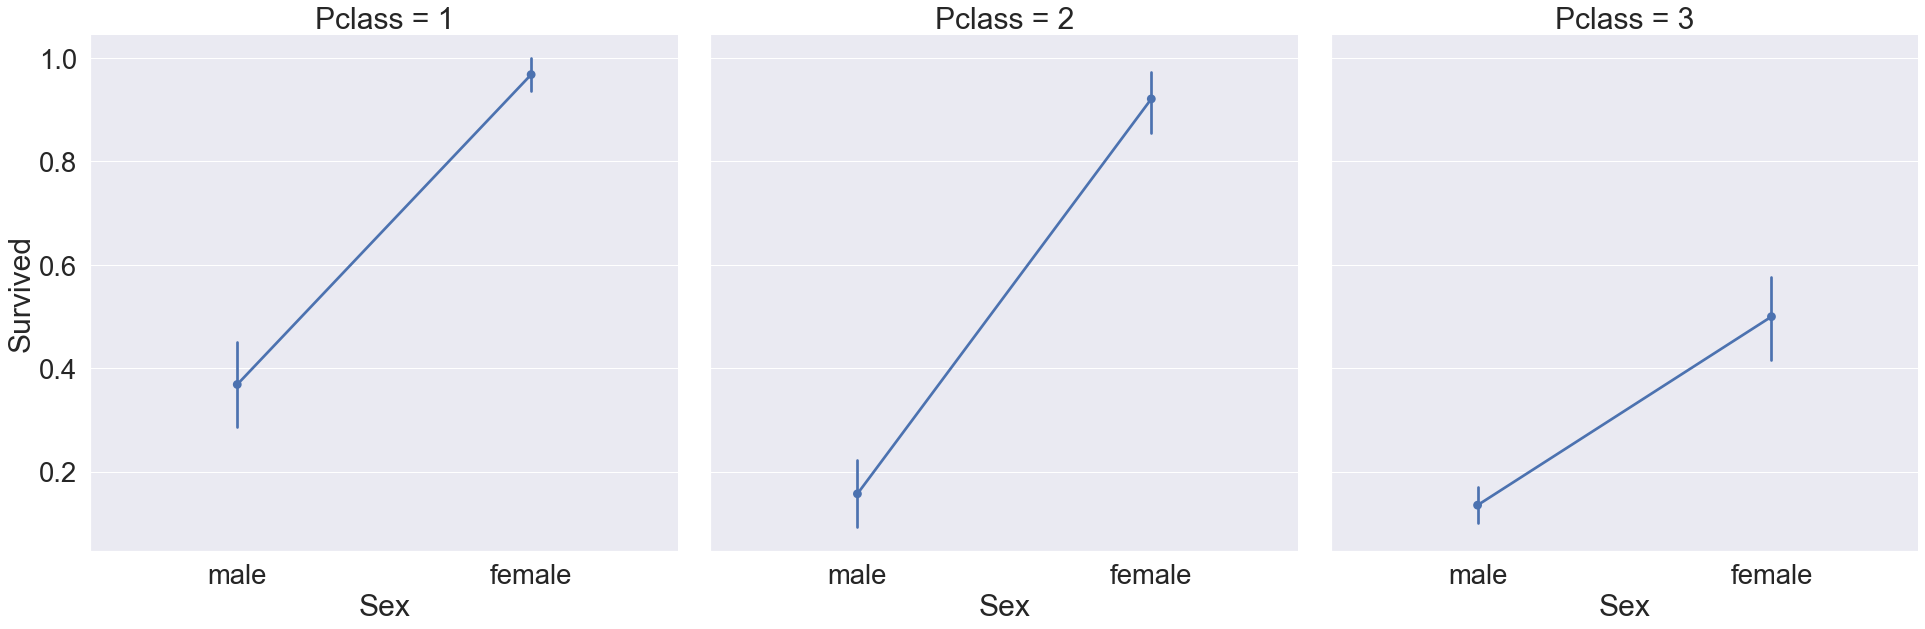

In [21]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation=.5, size=9, aspect=1)

* hue를 col로 바꾸면 다음과 같이 Pclass당 남여의 생존비를 볼 수 있습니다.
* saturation은 색상을 그릴 원래 채도의 비율입니다. 큰 패치는 종종 약간 채도가 낮은 색상으로 더 잘 보이지만 1플롯 색상이 입력 색상 사양과 완벽하게 일치하도록 하려면 이 옵션을 설정하십시오 .
 * 하지만 이 값을 다른 값으로 바꿔도 직관적이지 않아서 잘 모르겠음.

# 2.4 Age

In [22]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객의 평균 나이대 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 나이 어린 탑승객 : 0.4 years
탑승객의 평균 나이대 : 29.7 years


* df_train['Age']는 승객의 나이가 있음.

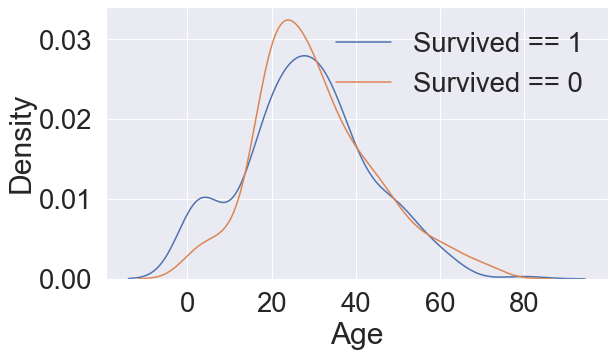

In [23]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1','Survived == 0'])
plt.show()

* 생존자 중 나이가 어린 경우가 많음을 볼 수 있음.

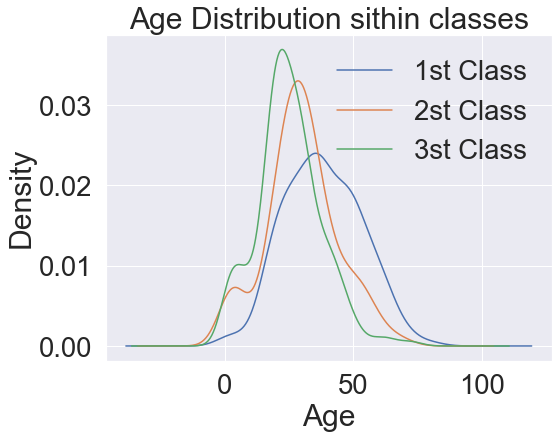

In [24]:
# kde 그래프를 plot으로 그리는 방법
plt.figure(figsize=(8, 6))

df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution sithin classes')
plt.legend(['1st Class', '2st Class', '3st Class'])

* kde : 통계에서 커널 밀도 추정 (KDE)은 확률 변수의 확률 밀도 함수(PDF)를 추정하는 비모수적 방법입니다. 이 기능은 가우스 커널을 사용하며 자동 대역폭 결정을 포함합니다.
* df_train의 Pclass가 1인 것만 df_train의 Age에서 보여달라는 의미


* kind 안에 생성할 그래프의 종류를 선택할 수 있음.
 * 'line’ : line plot (default)
 * 'bar’ : vertical bar plot
 * 'barh’ : horizontal bar plot
 * 'hist’ : histogram
 * 'box’ : boxplot
 * 'kde’ : Kernel Density Estimation plot
 * 'density’ : same as ‘kde’
 * 'area’ : area plot
 * 'pie’ : pie plot
 * 'scatter’ : scatter plot (DataFrame only)
 * 'hexbin’ : hexbin plot (DataFrame only)
 
 
* Class 별로 나이대를 알 수 있습니다
* Pclass 1은 나이대가 2와 3에 비해서 많음을 알 수 있습니다
* Pclass 3은 1과 2에 비해 나이대가 어림을 알 수 있습니다


* 나이대가 변하면서 생존률이 어떻게 되는 지 보려고합니다.
* 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

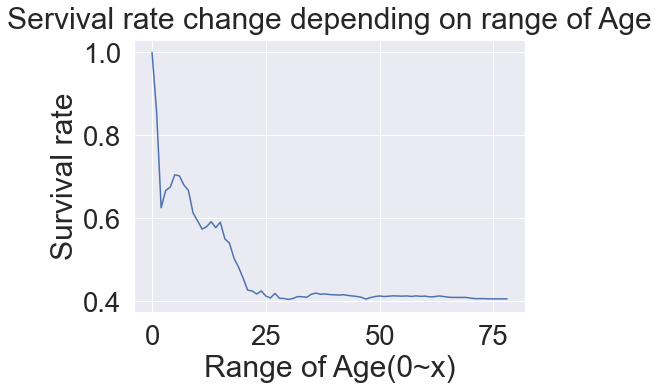

In [25]:
cummulate_survival_ratio = []

for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 5))
plt.plot(cummulate_survival_ratio)
plt.title('Servival rate change depending on range of Age', y=y_position) # y=1.02
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 나이가 어릴 수록 생존률이 높은 것을 알 수 있습니다.
* 중요한 feature로 사용할 수 있음을 확인하였습니다.

# 2.5 Pclass, Sex, Age
 * 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 violinplot 입니다.
 * x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.

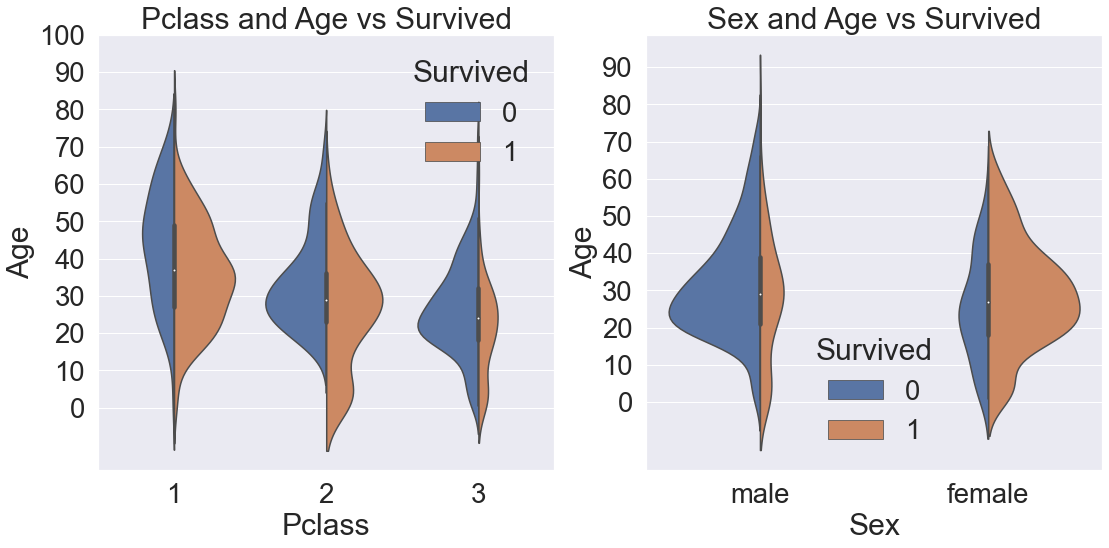

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 100, 10))
plt.show()

* 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.
* 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프입니다.
* 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.
* 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.
여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

* Violin plot
 * 중심선을 따라 대칭인 KDE plot이 있음.
 * 가운데 흰색 점은 중앙값(median)
 * violin 중앙의 두꺼운 선은 사분위범위
 * violin 중앙의 얇은 선은 신뢰구간을 나타냄(bar plot과 마찬가지로 95% 신뢰구간이 표시)
 * violin = KDE + Box
 

* [Violin Plot 설명](https://hleecaster.com/python-seaborn-violinplot/)
* [신뢰구간](https://bioinformaticsandme.tistory.com/256)

# 2.6 Embarked
 * 탑승한 항구
 * 탑승한 곳에 따른 생존률 확인

<AxesSubplot:xlabel='Embarked'>

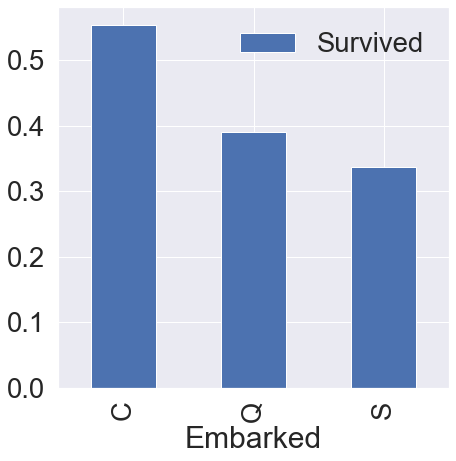

In [27]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

* C, Q, S는 (C = Cherbourg, Q = Queenstown, S = Southampton)
 * 차례대로 프랑스, 영국, 영국
* C가 생존률이 높음
* 여기서는 항구별 생존률이 비슷하다고 설명하고 있으며 모델에 얼마나 많은 영향을 끼칠지는 모르겠다고 설명하고 있다. 
* 추후 feature들이 모델에 얼마나 중요한 역할을 했는지 살펴볼 수 있다고 하였다.

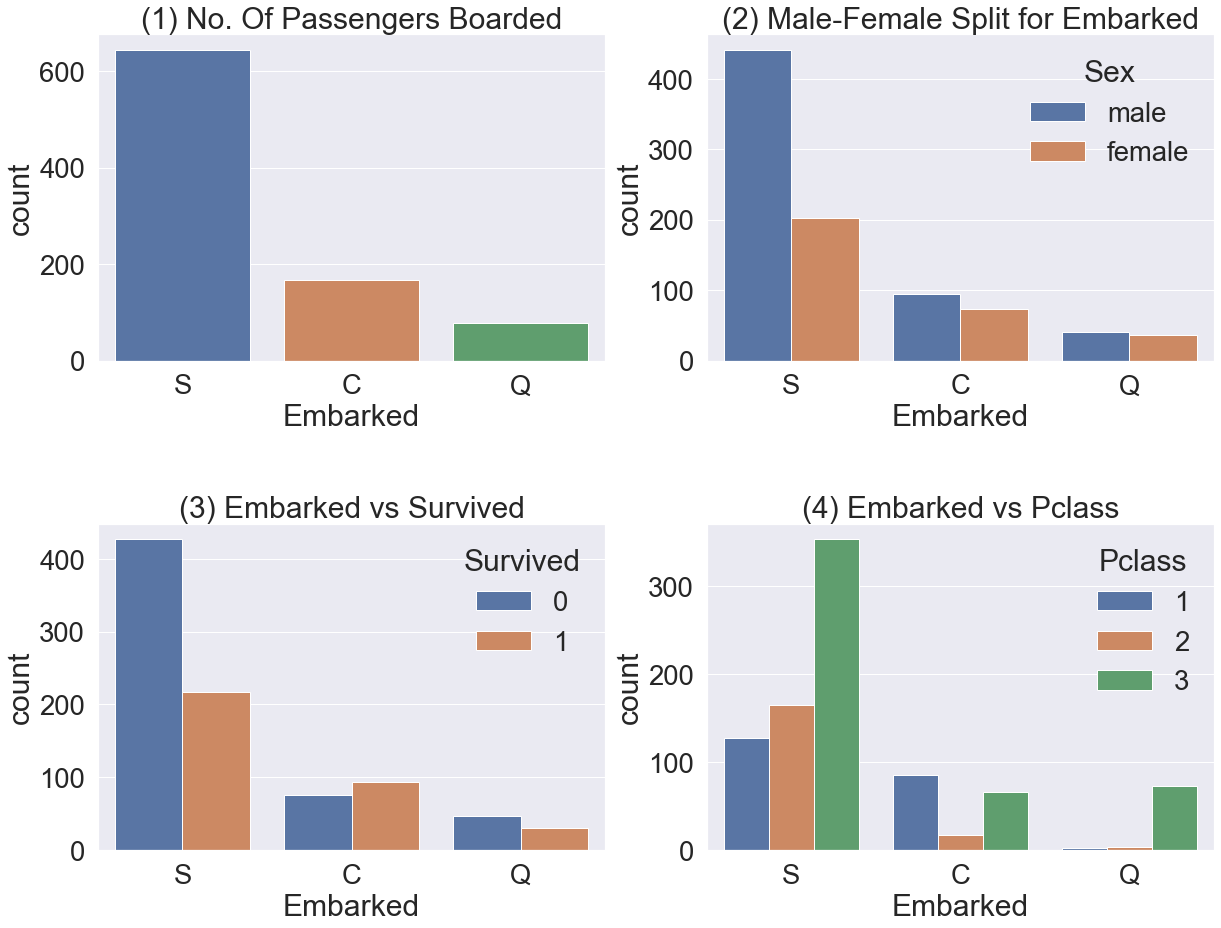

In [28]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure(1)
 * S에서 많이 탑승했다.
* Figure(2)
 * C와 Q는 남녀의 비율이 비슷함.
 * S는 남자가 여자보다 2배 더 많이 탑승하였다.
 * C와 Q를 합쳐도 S보다 적게 탑승했다.
* Figure(3)
 * C와 Q를 합쳐도 S의 생존률보다 낮다.
 * C와 Q를 합쳐도 S가 더 많이 사망했다.
 * C는 여자가 많이 죽었다.
* Figure(4)
 * S의 대부분의 인원은 3등석에 탔다.
 * Q의 대부분의 인원은 3등석이다.
 * Figure(3)과 Figure(4)의 S를 비교해보면 사망자가 400명이 넘는데 대부분은 3등석에 탄 사람들이 많이 죽었음을 알 수 있다. 그리고 사망률이 S가 제일 높음을 알 수 있다.

* subplots_adjust : subplots 간의 간격 조절
 * wspace : subplot 사이의 너비
 * wspace : subplot 사이의 높이
 
 
* countplot
 * 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있음.(각 범주형 bin의 관측값 개수 표시)
 * hue로 bar 구분이 가능함.
 * xtick, ytick, xlabel, ylabel, legend가 자동으로 setting 됨.

# 2.7 Family -SibSp(형제 자매) + Parch(부모, 자녀)
 * SibSp와 Parch를 합하면 Family가 될 것입니다. Family로 합쳐서 분석해봅시다.

In [29]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [30]:
df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

* +1은 자신을 포함했기 때문이다
* series 끼리는 더하고 빼는게 가능

In [31]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Maximum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Maximum size of Family:  1


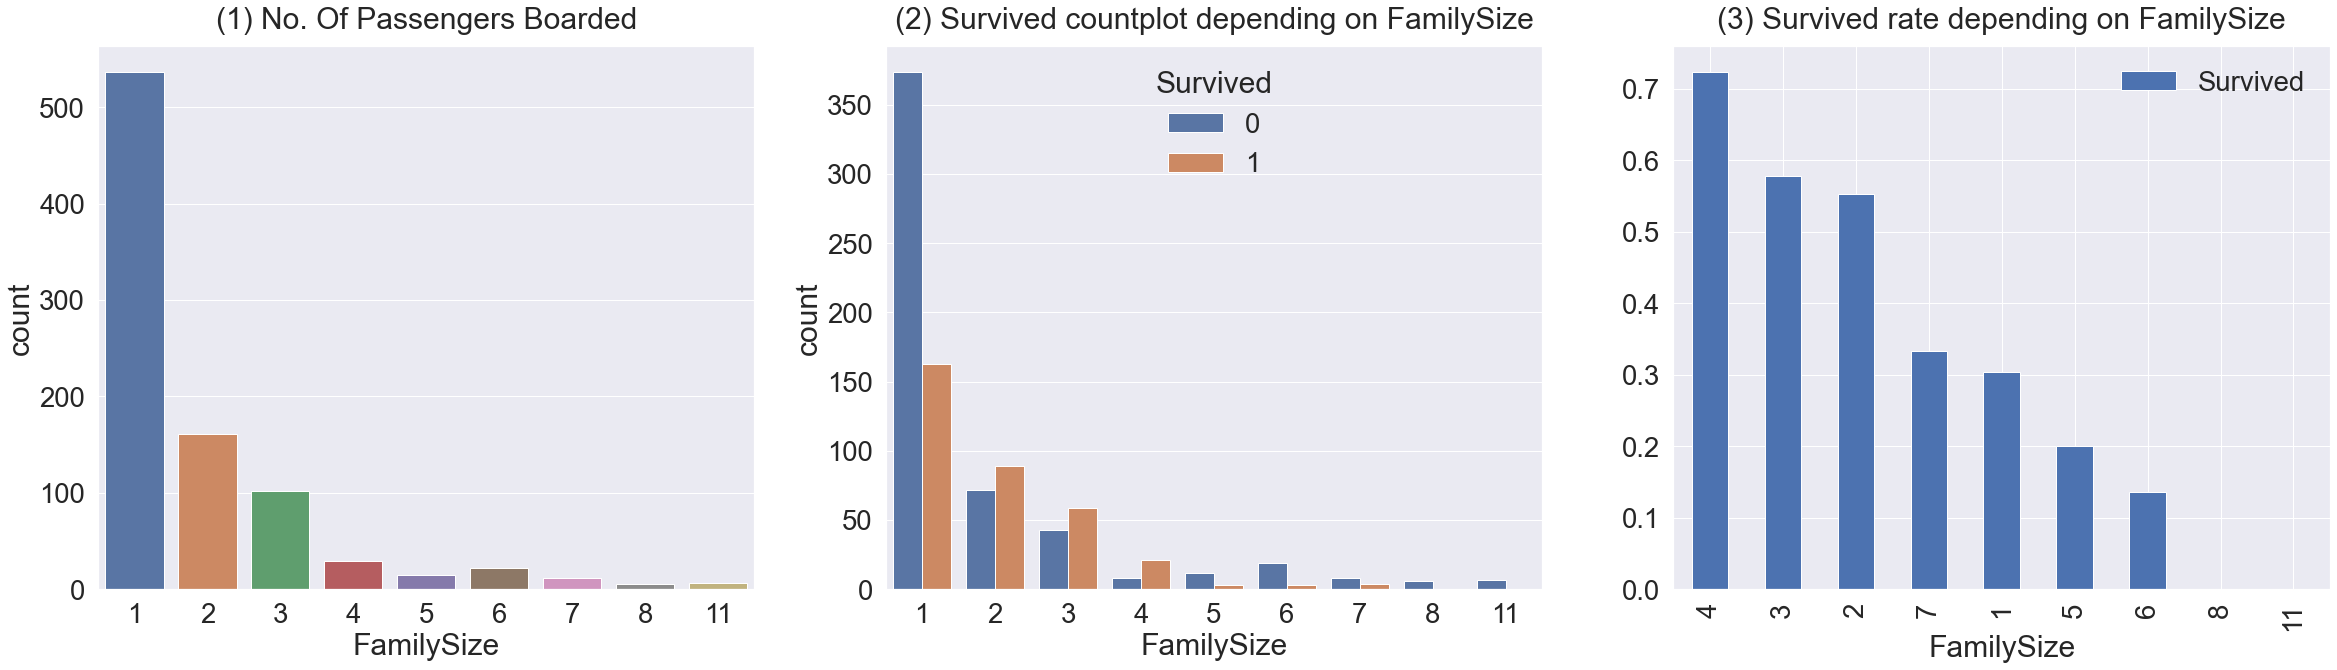

In [43]:
f, ax = plt.subplots(1, 3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=y_position) # 1.02

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=y_position)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=y_position)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure(1) 가족 별 탑승객 수
 * 가족의 수가 1명부터 11명까지 있다.
 * 대부분은 1명으로 혼자 탑승하였다
 * 그 다음 2명, 3명, 4명이 많이 있다.
* Figure(2), (3) 가족과 생존률 비교
 * 1명으로 온사람들이 제일 많이 죽었다.
 * 가족의 수가 5명 이상부터 생존확률이 낮음을 알 수 있다.
 * 가족이 2, 3, 4명일 때 생존확률이 높음을 알 수 있다. 

* sort_values by 
 * 정렬하고자 하는 column명을 지정

# 2.8 Fare
 * Fare는 탑승 요금이며, contious feature 입니다.

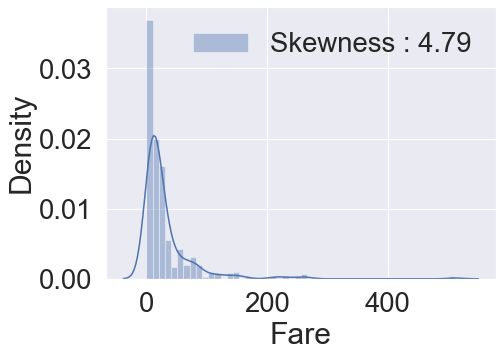

In [33]:
f, ax = plt.subplots(1, 1, figsize=(7,5))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* distribution이 매우 비대칭(편향) -> high skewness(right skewness) 높은 왜도
* 몇개 없는 outlier는 모델에 많은 영향을 미칠 수 있음.
* 대부분이 0-150 사이
* outlier를 제거해주거나 여기서는 log를 취해서 분포를 변화시킬 예정(정규분포)
* pandas에서 map과 apply를 활용할 예정
* Fare 값 모두를 log로 만드려고 할 때 lambda에 인수로 넣어주면 pandas의 Fare에 다 각각의 행마다 적용 됨.(아주 유용함 숙지할 것)
 * 실제로 전처리에서 많이 사용하였음.

In [34]:
# testset에 있는 nan value를 평균값으로 치환
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fate'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

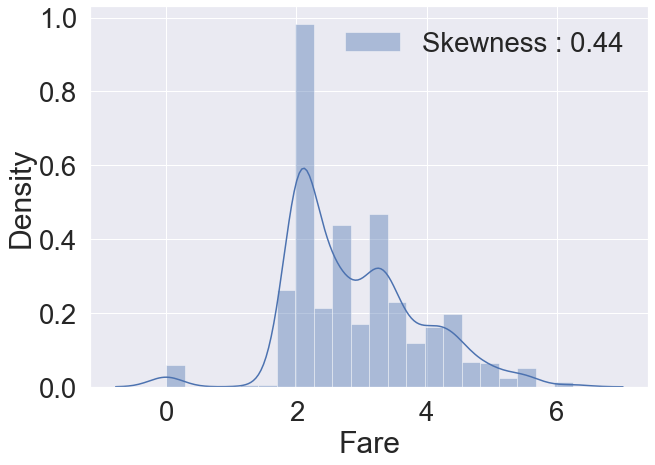

In [35]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* pandas .isnull() : 결측값을 bool(True, False)로 반환
* pandas .skew() : 축에 대해 편향되지 않은 skew를 반환(N-1에 의해 정규화)


* log를 취하면 비대칭이 완화됨을 알 수 있다.
* 이러한 작업을 통해 모델이 좀 더 좋은 성능을 낼 수 있도록 할 수 있음.
* feature engineering : 모델에 넣기전에 데이터를 알맞게 전처리하는 것

# 2.9 Cabin
 * cabin은 Nan 값이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기 쉽지 않습니다.
 * 모델에 포함하지 않도록 합니다.
 * 1.1 null data check를 보면 77%임을 알 수 있습니다.

In [36]:
df_train['Cabin'].isnull().sum()

687

# 2.10 Ticket
 * NaN 값이 없는 feature
 * str이므로 모델에 넣기 위해서는 int 혹은 float의 숫자로 변환해야할 필요가 있습니다.

In [37]:
df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [38]:
df_train['Ticket'].value_counts()

347082               7
1601                 7
CA. 2343             7
CA 2144              6
347088               6
                    ..
STON/O 2. 3101274    1
PC 17609             1
347081               1
345781               1
334912               1
Name: Ticket, Length: 681, dtype: int64

* ticket number를 어떻게 활용할지는 스스로 해보기
* 본 튜토리얼은 https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python, https://www.kaggle.com/startupsci/titanic-data-science-solutions, https://www.kaggle.com/ash316/eda-to-prediction-dietanic, https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 을 참고하여 만들었습니다.